In [1]:
from features_version.batch_create_feature import batch_create_features
from features_version.v1_feature import v1_feature
import logging
from logger_config import log_manager, get_module_logger
log_manager.set_levels(
    file_level=logging.WARNING,    # 文件记录详细信息
    console_level=logging.WARNING   # 控制台只显示重要信息
)
logger = get_module_logger()# 简洁模式 - v1_feature和batch_create_features都会使用简洁输出
batch_create_features("/mnt/d/UserData/lidonghaowsl/data/Stability_PS/raw", "/mnt/d/UserData/lidonghaowsl/data/Stability_PS/features", v1_feature)

处理: #20250804007-1-稳定性测试-test_20250815134210_290e653d....:   0%|          | 0/12 [00:00<?, ?文件/s]2025-08-28 23:00:07 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-2-稳定性测试-test_20250815134210_403dce1b....:   8%|▊         | 1/12 [00:08<01:29,  8.14s/文件, 成功=1, 失败=0, 进度=1/12]2025-08-28 23:00:15 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-3-稳定性测试-test_20250815134210_6b44fb0e....:  17%|█▋        | 2/12 [00:15<01:18,  7.89s/文件, 成功=2, 失败=0, 进度=2/12]2025-08-28 23:00:23 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
处理: #20250804007-4-稳定性测试-test_20250815134210_480af66c....:  25%|██▌       | 3/12 [00:23<01:11,  7.99s/文件, 成功=3, 失败=0, 进度=3/12]2025-08-28 23:00:31 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616


=== 批量处理完成 ===
✅ 成功: 12/12 个文件


In [ ]:
# from features_version.v1_feature import v1_feature

# print('=== 运行v1 ===')
# v1_file = v1_feature('/mnt/d/UserData/lidonghaowsl/data/Stability_PS/#20250804007-4-稳定性测试-test_20250815134210_480af66c.h5')

# print(f'\n最终文件: {v1_file}')

=== 运行v1 ===
=== 创建最终HDFView兼容特征文件 ===
原始文件: /mnt/d/UserData/lidonghaowsl/data/Stability_PS/#20250804007-4-稳定性测试-test_20250815134210_480af66c.h5
输出文件: data/features/#20250804007-4-稳定性测试-feat_20250815134210_480af66c.h5
📁 特征文件不存在，创建HDF5文件结构...
   ✅ HDF5文件结构创建成功：data/features/#20250804007-4-稳定性测试-feat_20250815134210_480af66c.h5
开始特征提取和保存...
1. 加载实验数据...
   实验信息: {'sync_mode': True, 'batch_id': 'batch_20250815134210_78ab3cfe', 'test_id': 'test_20250815134210_480af66c', 'name': 'Test Unit F1_20250815134210', 'description': '稳定性测试'}
   设备信息: {'chip_id': '#20250804007', 'device_number': '4'}
2. 计算Transfer特征...
警告: 正在加载所有transfer数据，这可能会消耗大量内存
   分析了 5001 个Transfer步骤
3. 提取特征数据...
   提取了 15 个特征，每个包含 5001 个步骤
4. 存储特征数据...
   成功存储 15/15 个特征
6. 创建版本化特征矩阵（包含所有可用特征）...
   发现 15 个已存储的特征
   特征列表: ['absgm_max_forward', 'absgm_max_reverse', 'Von_forward', 'Von_reverse', 'absI_max_raw', 'absgm_max_forward_Vg', 'absgm_max_forward_Id', 'absgm_max_reverse_Vg', 'absgm_max_reverse_Id', 'Von_forward_Vg', 'Von_f

# 加载特征数据

In [1]:
import matplotlib.pyplot as plt
from chip_feature_plotter import ChipFeaturePlotter, plot_chip_feature

# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plotter = ChipFeaturePlotter("/mnt/d/UserData/lidonghaowsl/data/Stability_PS/features/")

# 查看所有可用芯片
dir_stats = plotter.batch_manager.get_directory_statistics()
print(f"总文件数: {dir_stats['total_files']}")
print(f"芯片分布: {dir_stats['chip_distribution']}")


总文件数: 22
芯片分布: {'#20250804007': 6, '#20250804008': 6, '#20250825001': 5, '#20250825002': 5}


In [2]:

# 为每个芯片绘制相同特征
available_chips = list(dir_stats['chip_distribution'].keys())


In [3]:

# 找到所有芯片的共同特征
common_features = None
for chip_id in available_chips:
    chip_features = plotter.list_chip_features(chip_id)
    if common_features is None:
        common_features = set(chip_features)
    else:
        common_features &= set(chip_features)

common_features = list(common_features)
print(f"\n所有芯片的共同特征 ({len(common_features)} 个): {common_features}")



所有芯片的共同特征 (15 个): ['Von_forward_Id', 'absgm_max_reverse', 'Von_reverse_Vg', 'absI_max_raw_Vg', 'Von_forward', 'absgm_max_forward', 'absgm_max_reverse_Vg', 'absgm_max_forward_Id', 'Von_reverse_Id', 'absgm_max_forward_Vg', 'absgm_max_reverse_Id', 'Von_forward_Vg', 'absI_max_raw_Id', 'Von_reverse', 'absI_max_raw']


# absI_max_raw

2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.22e-06 ~ 2.35e-03
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.57e-06 ~ 3.73e-03
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 18:32:47 - chip_feature_plotter - INFO - chip_feature_p

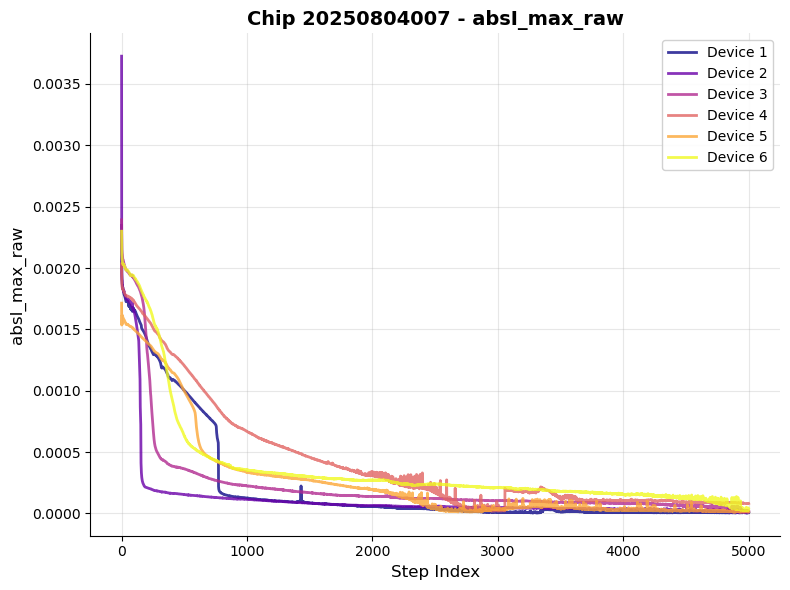

In [4]:
    
feature_name = 'absI_max_raw'
chip_id = '20250804007'
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5000 点
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.22e-06 ~ 2.00e-03
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5000 点
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.57e-06 ~ 1.96e-03
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5000 点
2025-08-31 18:33:13 - chip_feature_plotter - INFO - chip_feature_p

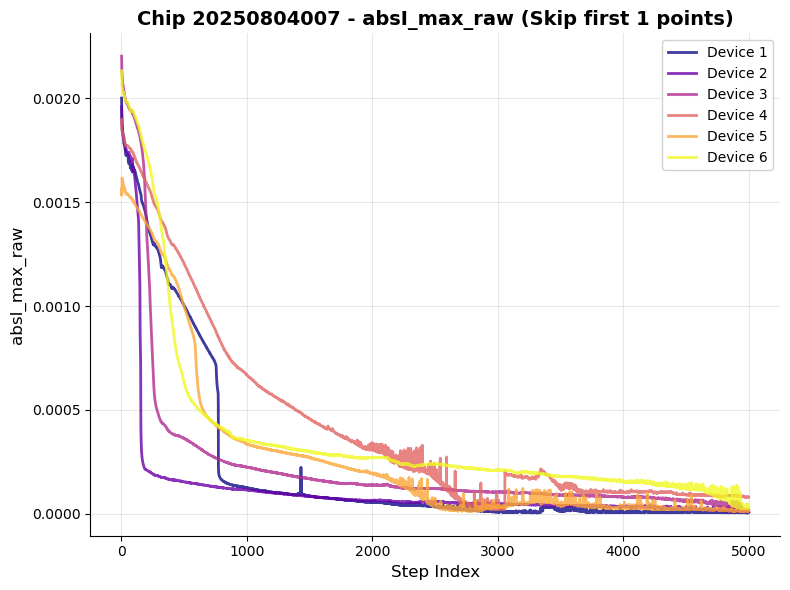

In [5]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.80e-03 ~ 1.00e+00
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.57e-03 ~ 1.00e+00
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 12:24:35 - chip_feature_plotter - INFO - chip_feature_p

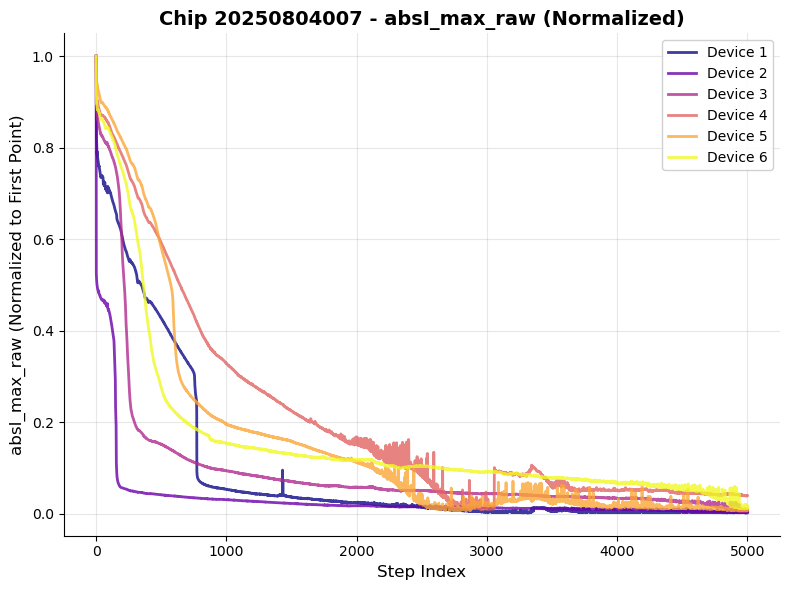

In [38]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5000 点
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.11e-03 ~ 1.00e+00
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5000 点
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.88e-03 ~ 1.00e+00
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5000 点
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_p

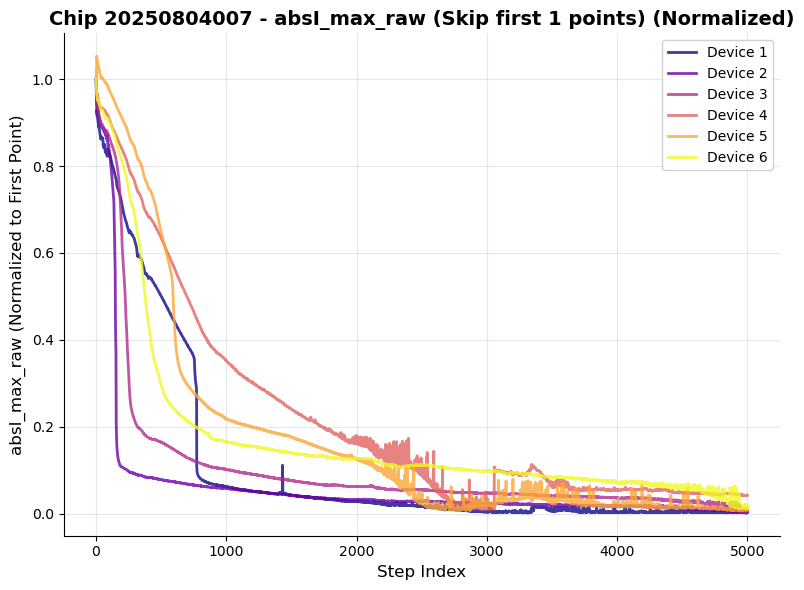

In [39]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4999 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.18e-03 ~ 1.00e+00
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4999 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.97e-03 ~ 1.00e+00
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4999 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_p

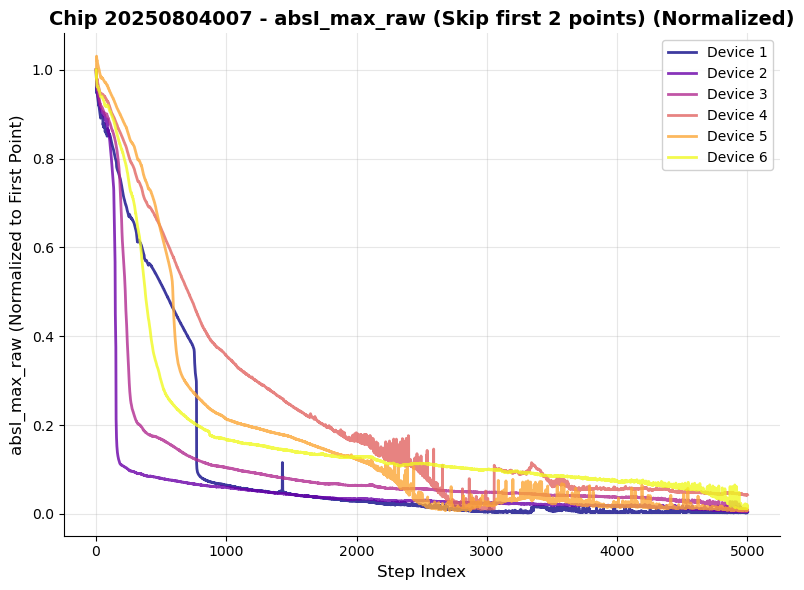

In [40]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=2,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 18:41:01 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 18:41:01 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.22e-06 ~ 1.86e-03
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.57e-06 ~ 1.88e-03
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 18:41:02 - chip_feature_plotter - INFO - chip_feature_p

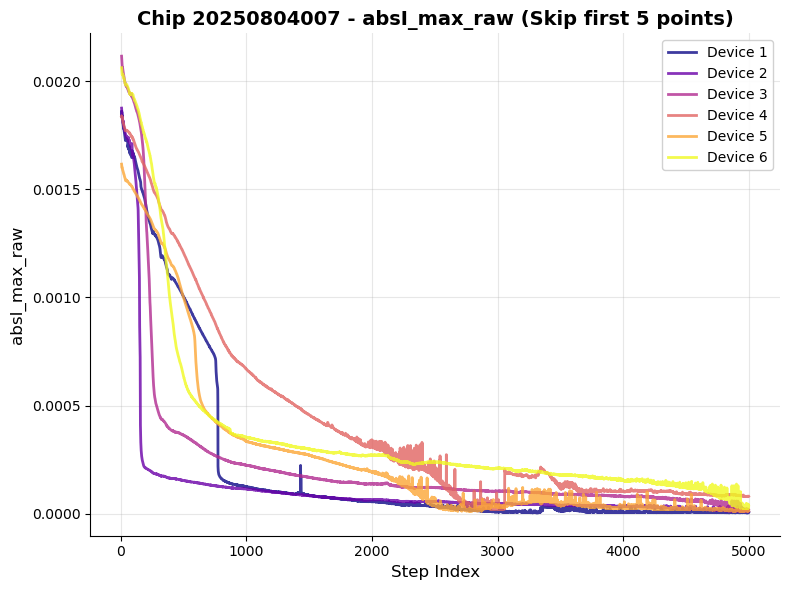

In [6]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.27e-03 ~ 1.00e+00
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.10e-03 ~ 1.00e+00
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 12:24:37 - chip_feature_plotter - INFO - chip_feature_p

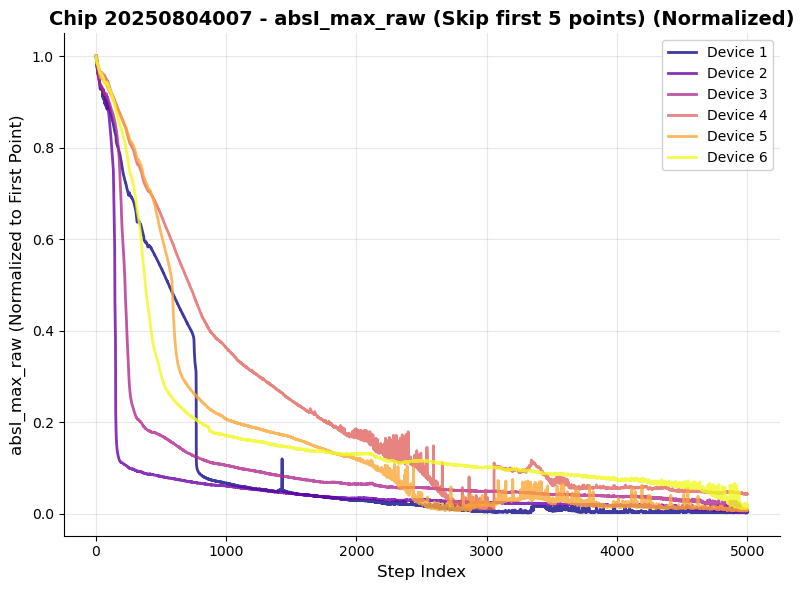

In [41]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4991 点
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.29e-03 ~ 1.00e+00
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4991 点
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.21e-03 ~ 1.00e+00
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4991 点
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_p

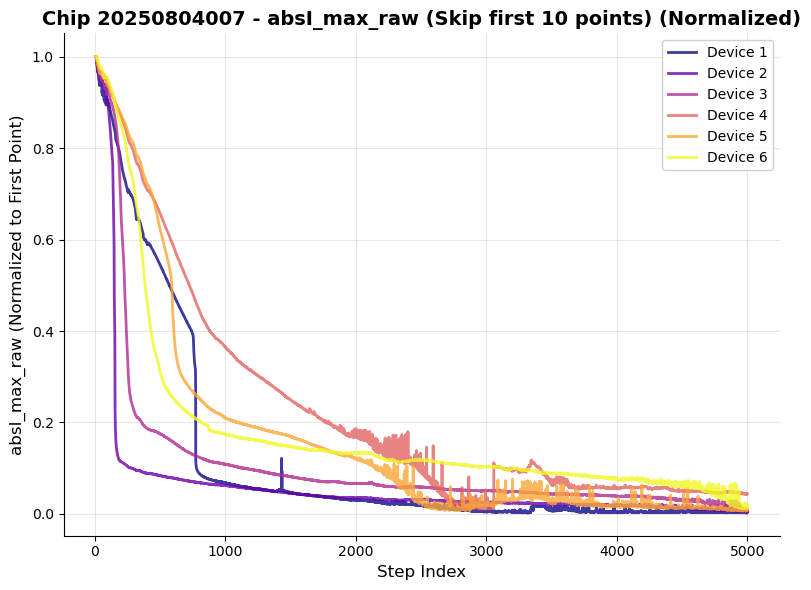

In [42]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=10,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4981 点
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.37e-03 ~ 1.00e+00
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4981 点
2025-08-31 12:24:38 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.32e-03 ~ 1.00e+00
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4981 点
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_p

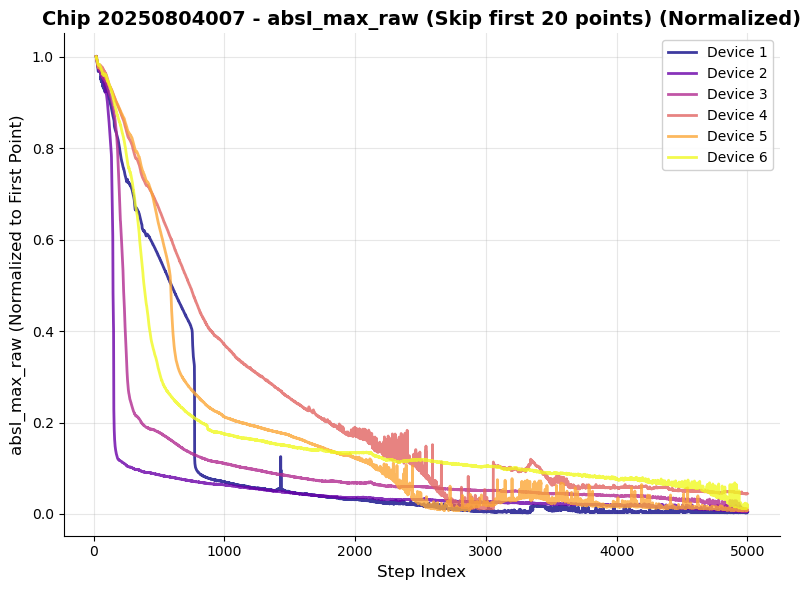

In [43]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=20,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4951 点
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.44e-03 ~ 1.00e+00
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4951 点
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.51e-03 ~ 1.00e+00
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4951 点
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_p

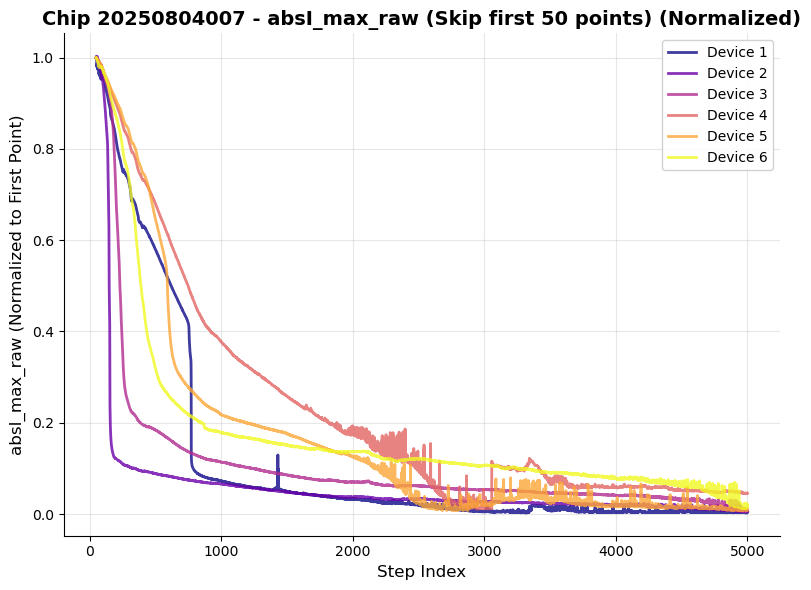

In [44]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=50,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:39 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4901 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.55e-03 ~ 1.00e+00
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4901 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.82e-03 ~ 1.00e+00
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4901 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_p

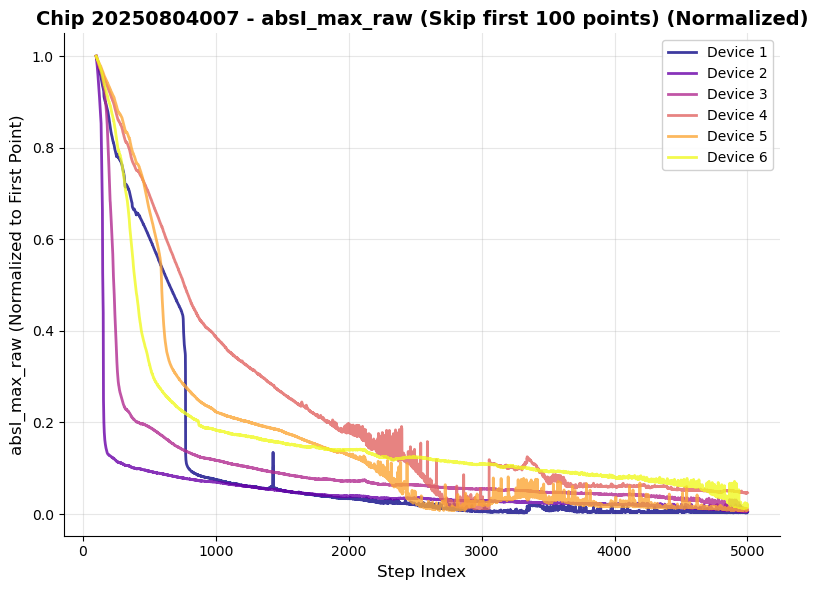

In [45]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=100,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4801 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 2.97e-03 ~ 1.00e+00
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4801 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.54e-02 ~ 1.00e+00
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4801 点
2025-08-31 12:24:40 - chip_feature_plotter - INFO - chip_feature_p

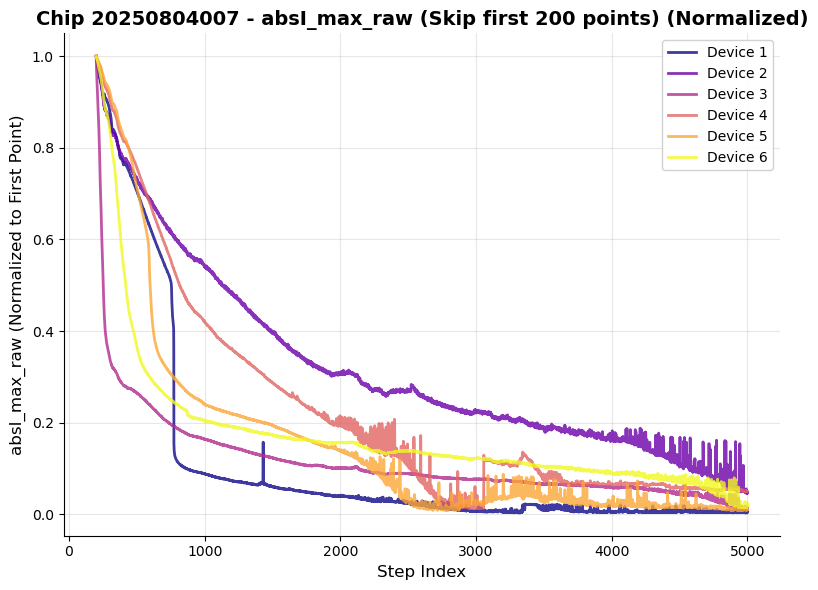

In [46]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4501 点
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.21e-03 ~ 1.00e+00
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4501 点
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.22e-02 ~ 1.00e+00
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4501 点
2025-08-31 12:24:58 - chip_feature_plotter - INFO - chip_feature_p

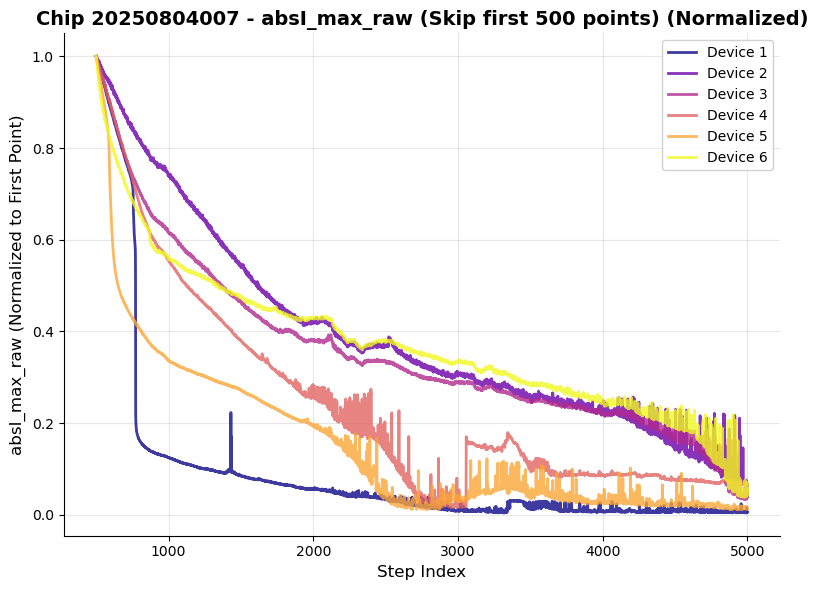

In [47]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=500,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4001 点
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 4.22e-06 ~ 2.24e-04
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4001 点
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.57e-06 ~ 1.14e-04
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4001 点
2025-08-31 12:25:36 - chip_feature_plotter - INFO - chip_feature_p

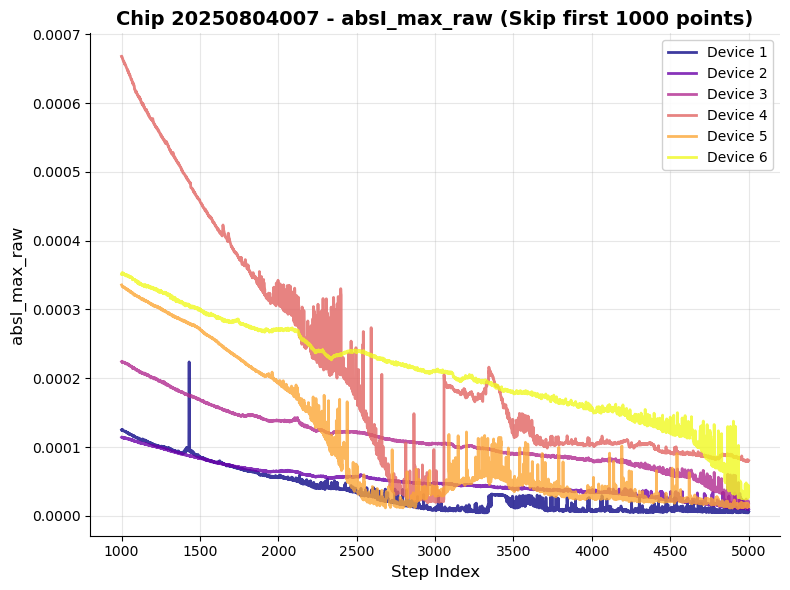

In [49]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1000,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absI_max_raw
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4001 点
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 3.38e-02 ~ 1.79e+00
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4001 点
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 8.39e-02 ~ 1.00e+00
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4001 点
2025-08-31 12:25:06 - chip_feature_plotter - INFO - chip_feature_p

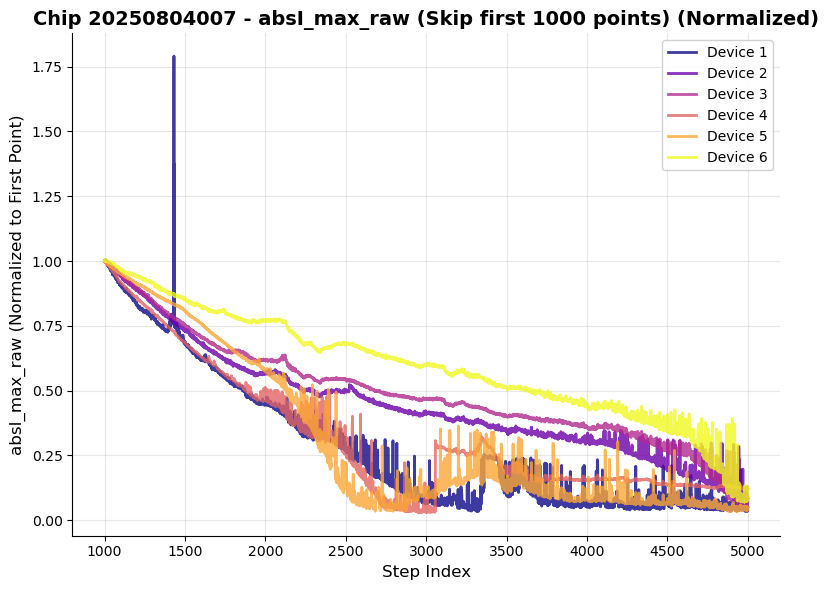

In [48]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1000,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)


# absgm_max_forward

2025-08-31 18:46:32 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 18:46:32 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.21e-05 ~ 7.46e-03
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.77e-05 ~ 1.12e-01
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 18:46:33 - chip_feature_plotter - INFO - chip_feat

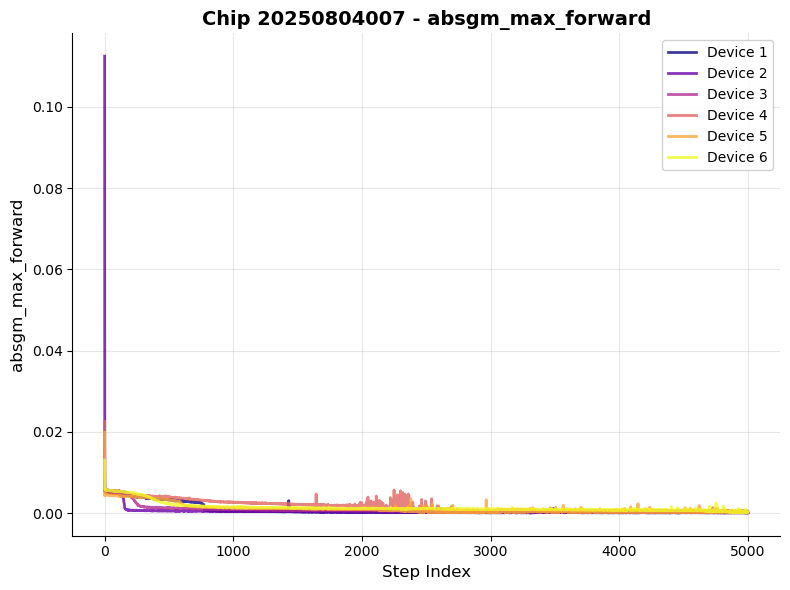

In [7]:
    
feature_name = 'absgm_max_forward'
chip_id = '20250804007'
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)


2025-08-31 12:27:15 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:15 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5001 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.99e-03 ~ 1.00e+00
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5001 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.02e-04 ~ 1.00e+00
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5001 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feat

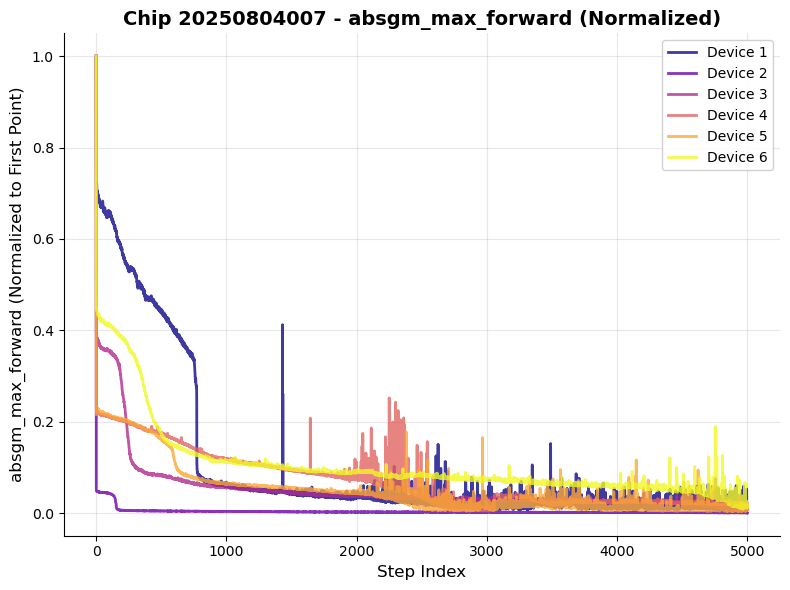

In [52]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=0,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5000 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.21e-05 ~ 5.66e-03
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5000 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.77e-05 ~ 5.54e-03
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5000 点
2025-08-31 12:27:16 - chip_feature_plotter - INFO - chip_feat

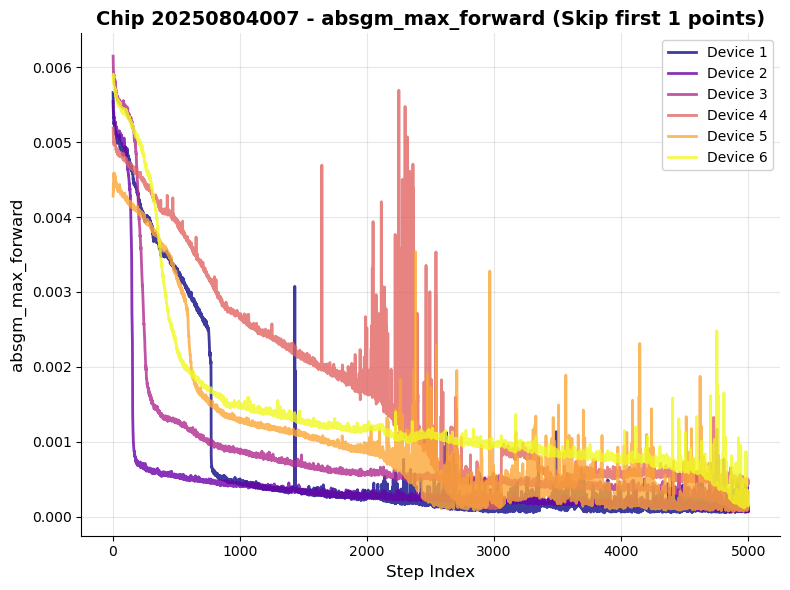

In [53]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 5000 点
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.21e-03 ~ 1.00e+00
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 5000 点
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.22e-02 ~ 1.00e+00
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 5000 点
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feat

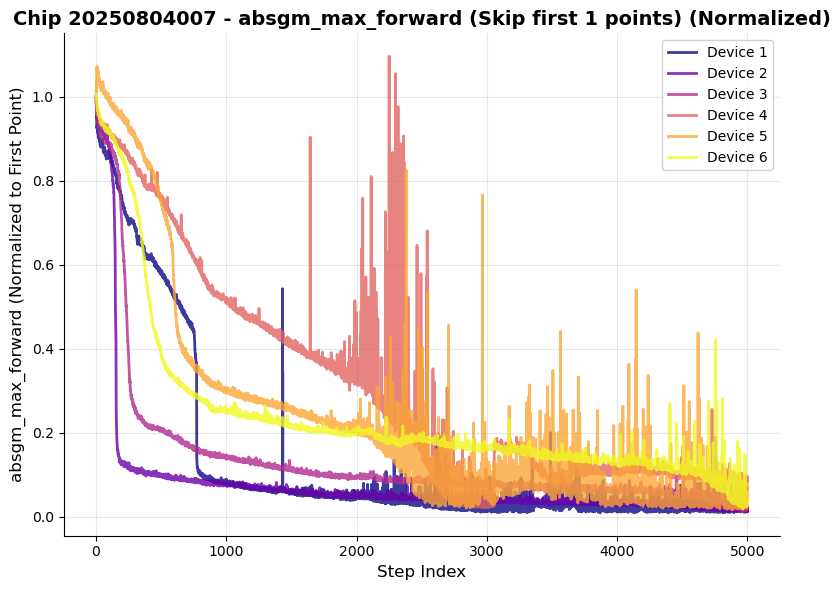

In [54]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=1,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:17 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4999 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.52e-03 ~ 1.00e+00
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4999 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.24e-02 ~ 1.00e+00
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4999 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feat

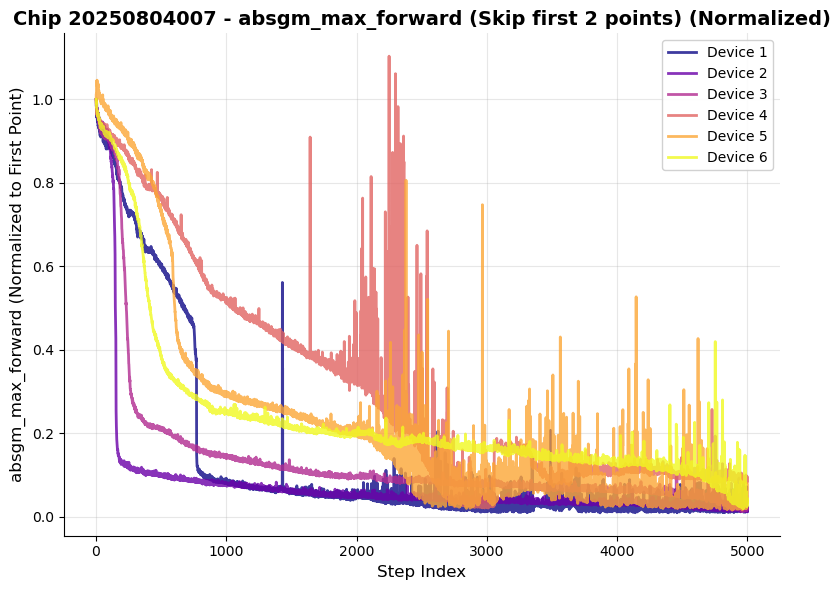

In [55]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=2,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.84e-03 ~ 1.00e+00
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.25e-02 ~ 1.00e+00
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 12:27:18 - chip_feature_plotter - INFO - chip_feat

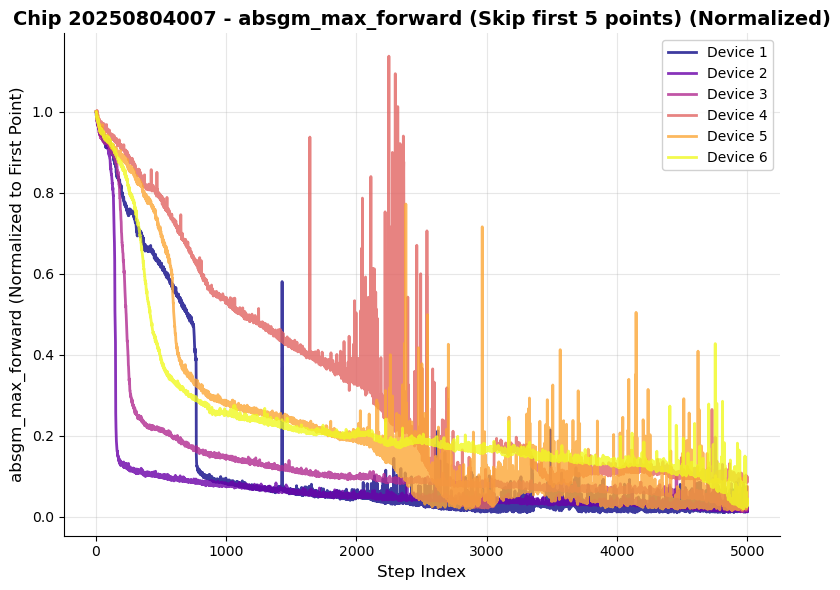

In [56]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 18:46:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 18:46:47 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4996 点
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.21e-05 ~ 5.30e-03
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4996 点
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.77e-05 ~ 5.40e-03
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4996 点
2025-08-31 18:46:48 - chip_feature_plotter - INFO - chip_feat

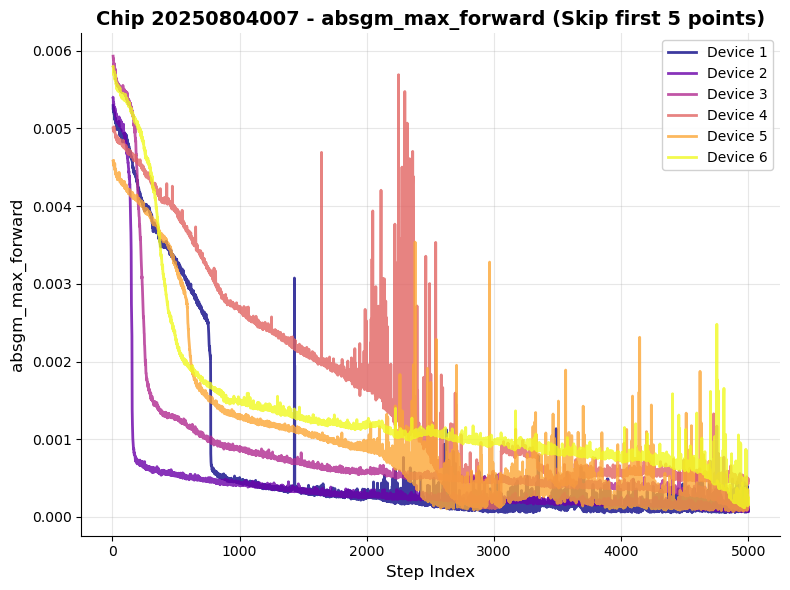

In [8]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=5,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4991 点
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.91e-03 ~ 1.00e+00
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4991 点
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.27e-02 ~ 1.00e+00
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4991 点
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feat

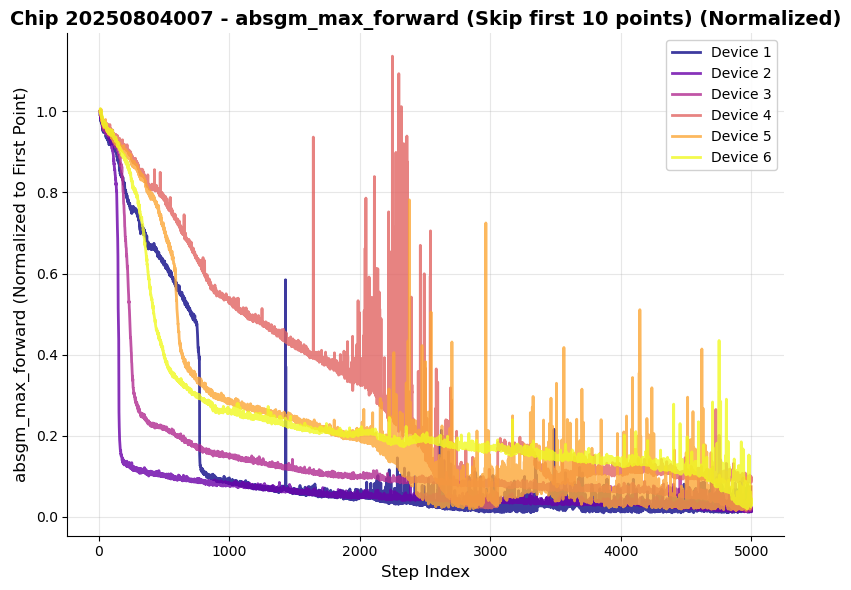

In [57]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=10,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:19 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4981 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.02e-02 ~ 1.01e+00
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4981 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.30e-02 ~ 1.00e+00
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4981 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feat

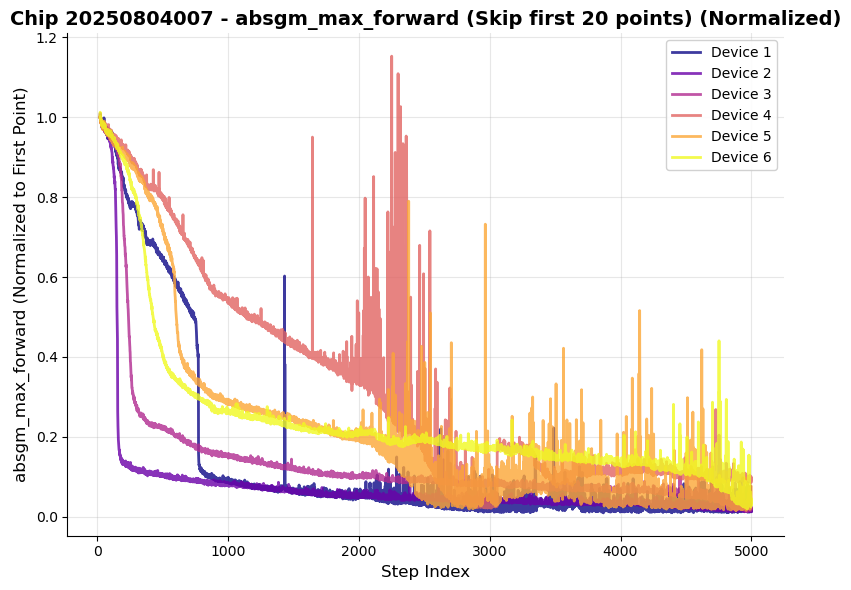

In [58]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=20,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4951 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.02e-02 ~ 1.00e+00
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4951 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.34e-02 ~ 1.02e+00
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4951 点
2025-08-31 12:27:20 - chip_feature_plotter - INFO - chip_feat

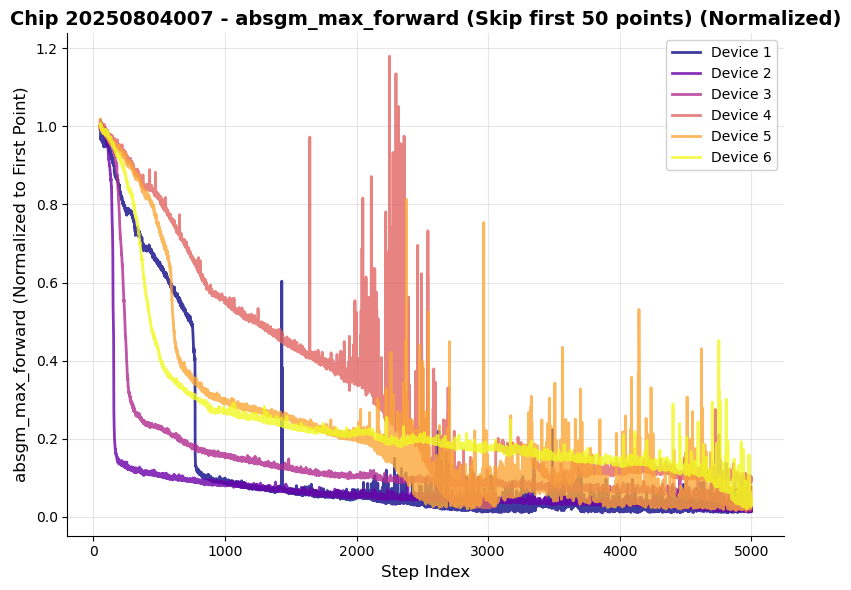

In [59]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=50,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4901 点
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.06e-02 ~ 1.00e+00
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4901 点
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.38e-02 ~ 1.00e+00
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4901 点
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feat

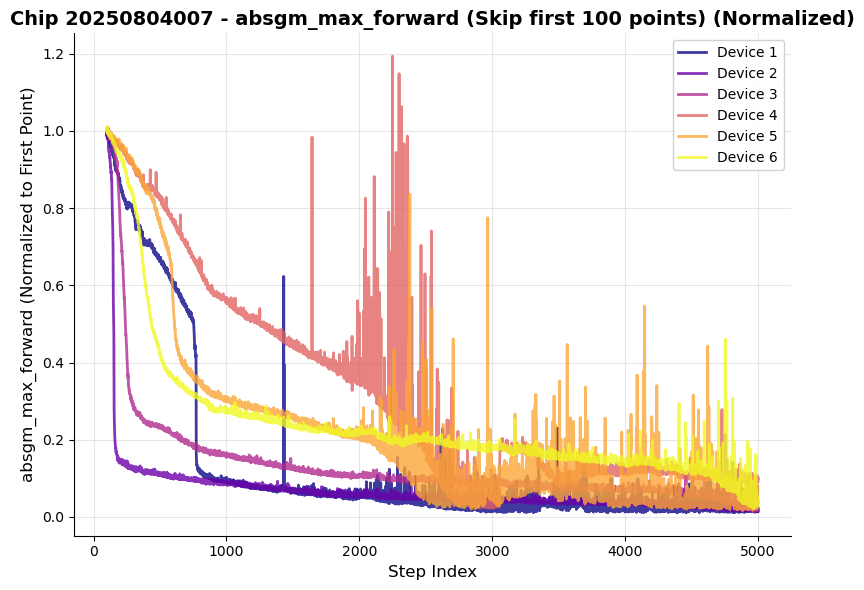

In [60]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=100,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:21 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4801 点
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 1.23e-02 ~ 1.00e+00
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4801 点
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 9.55e-02 ~ 1.03e+00
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4801 点
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feat

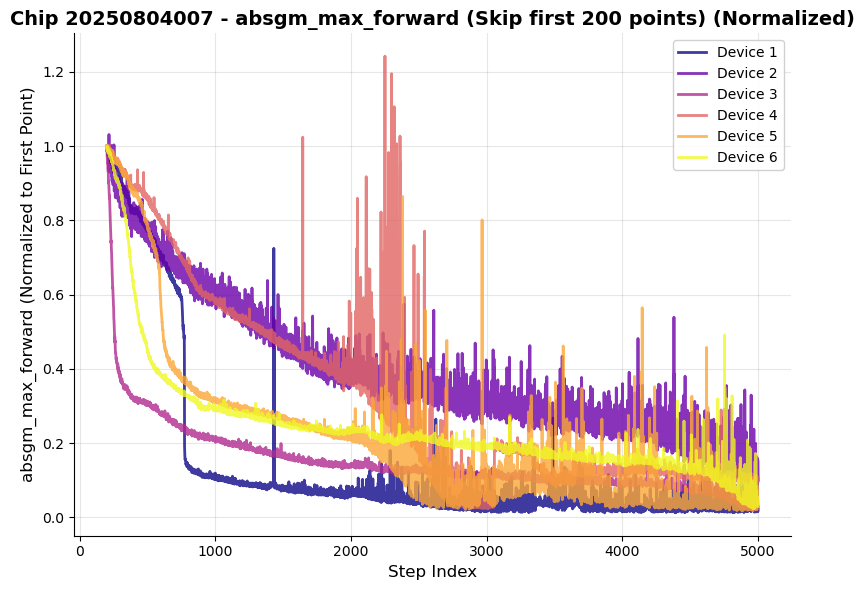

In [61]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=True,
    markersize=0,
    figsize=(8, 6),
)

2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:88 - 开始绘制芯片 20250804007 的特征 absgm_max_forward
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:96 - 找到 6 个特征文件
2025-08-31 12:27:22 - chip_feature_plotter - INFO - chip_feature_plotter.py:138 - 成功加载 6 个设备的数据
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:234 - 数据处理摘要:
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 1: 5001 -> 4801 点
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 5.21e-05 ~ 4.24e-03
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 2: 5001 -> 4801 点
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:238 -     数据范围: 6.77e-05 ~ 7.32e-04
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feature_plotter.py:236 -   设备 3: 5001 -> 4801 点
2025-08-31 12:27:23 - chip_feature_plotter - INFO - chip_feat

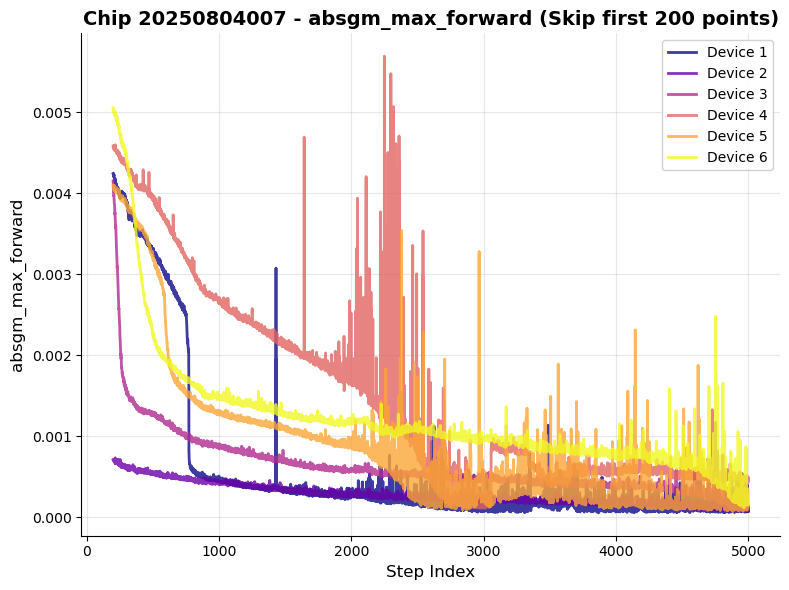

In [62]:
fig = plotter.plot_chip_feature(
    chip_id=chip_id,
    feature_name=feature_name,
    skip_points=200,
    normalize_to_first=False,
    markersize=0,
    figsize=(8, 6),
)